# Normal Nails vs Terry's Nails Classification using Simple CNN and MobileNet Transfer Learning
###Sayyidan Muhamad Ikhsan

###20/460160/TK/50749


---



Kondisi "terry's nails" adalah suatu kondisi yang dapat terjadi pada kuku manusia, yang ditandai dengan perubahan pada penampilan kuku yang terlihat putih pucat atau keabu-abuan dengan garis merah coklat atau coklat gelap pada ujung kuku. Kondisi ini dinamai dari Dr. Richard Terry yang pertama kali mendokumentasikannya pada tahun 1954.

Terry's nails terkait dengan beberapa penyakit serius, termasuk masalah kesehatan yang mempengaruhi hati, ginjal, jantung, atau diabetes. Hubungannya dengan penyakit-penyakit ini terutama melalui mekanisme yang terlibat dalam pembentukan dan pertumbuhan kuku.

- Hati: Kondisi hati yang parah seperti sirosis hati dapat mengubah struktur dan warna kuku. Terry's nails adalah salah satu tanda yang dapat muncul pada orang dengan sirosis hati atau gangguan hati lainnya.

- Ginjal: Kondisi seperti gagal ginjal kronis atau gagal ginjal akut dapat mempengaruhi pertumbuhan dan struktur kuku, termasuk mengubah warna kuku menjadi pucat atau keabu-abuan.

- Jantung: Beberapa kondisi jantung yang parah, seperti gagal jantung kongestif, dapat menyebabkan perubahan pada kuku, termasuk Terry's nails.

- Diabetes: Penderita diabetes yang tidak terkontrol dengan baik dapat mengalami perubahan pada kuku, termasuk Terry's nails, karena diabetes dapat mempengaruhi sirkulasi darah dan nutrisi yang mencapai kuku.

Terry's nails mungkin juga terkait dengan kondisi lain, termasuk hipotiroidisme, malnutrisi, dan beberapa jenis kanker. Namun, penting untuk diingat bahwa Terry's nails bukanlah diagnosis tunggal yang dapat menunjukkan secara pasti suatu penyakit. Sebagai gantinya, merupakan tanda yang memicu perluasan penilaian medis lebih lanjut dan pemeriksaan lebih lanjut untuk mendiagnosis penyakit yang mendasarinya. Jika Anda mengalami perubahan pada kuku atau memiliki kekhawatiran tentang kesehatan Anda, sebaiknya konsultasikan dengan dokter untuk evaluasi lebih lanjut dan penanganan yang sesuai.


# Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Avoid OOM errors by setting GPU Memory Consumption Growth
#Normally, when load in tensorflow it's going to expand and use all of the potential available Vram
#this code can prevent that happens
gpus = tf.config.experimental.list_physical_devices('GPU')
#limitting the memori growth -> keep it the memory to minimum or whetever absolutely need
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
dataset ="/content/drive/MyDrive/BAI/two nail class"

In [ ]:
os.listdir(dataset)

['normal', 'terry_s nail']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(dataset)
#building data pipeline

Found 285 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
#convert or allow us to access the generator from our data pipeline
#allowing to loop

In [ ]:
batch = data_iterator.next()
#accessing data pipeline
#grabbing one batch back

In [ ]:
batch[0].shape
#images represented as numpy

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

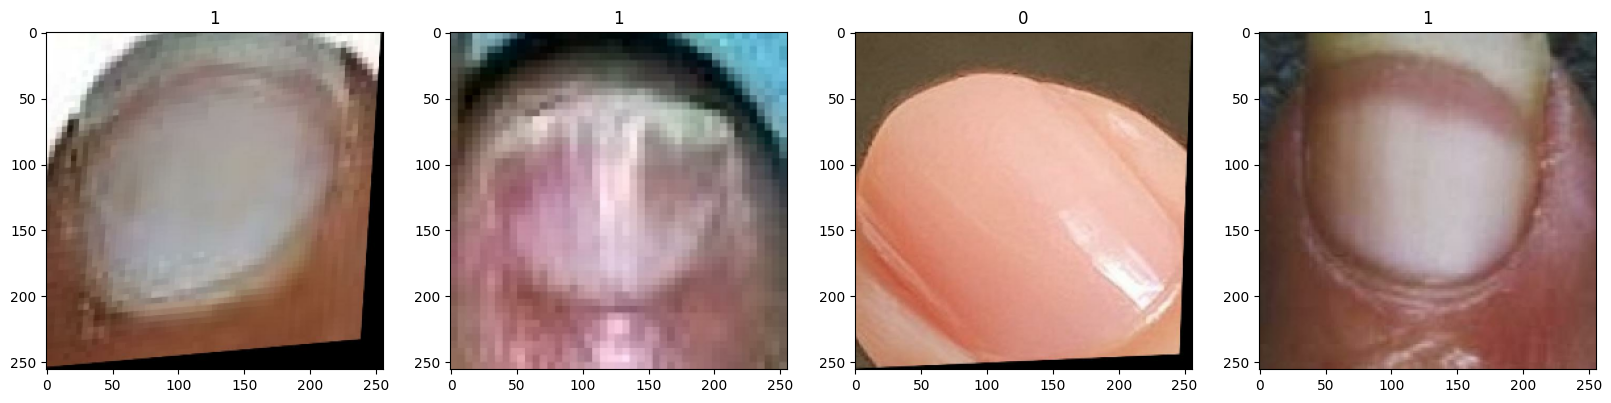

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#0 label means healthy nail
#1 means terry's

## Pre-process

In [ ]:
#scale data
data = data.map(lambda x,y:(x/255,y)) #x image, y label

In [ ]:
#data.as_numpy_iterator().next()

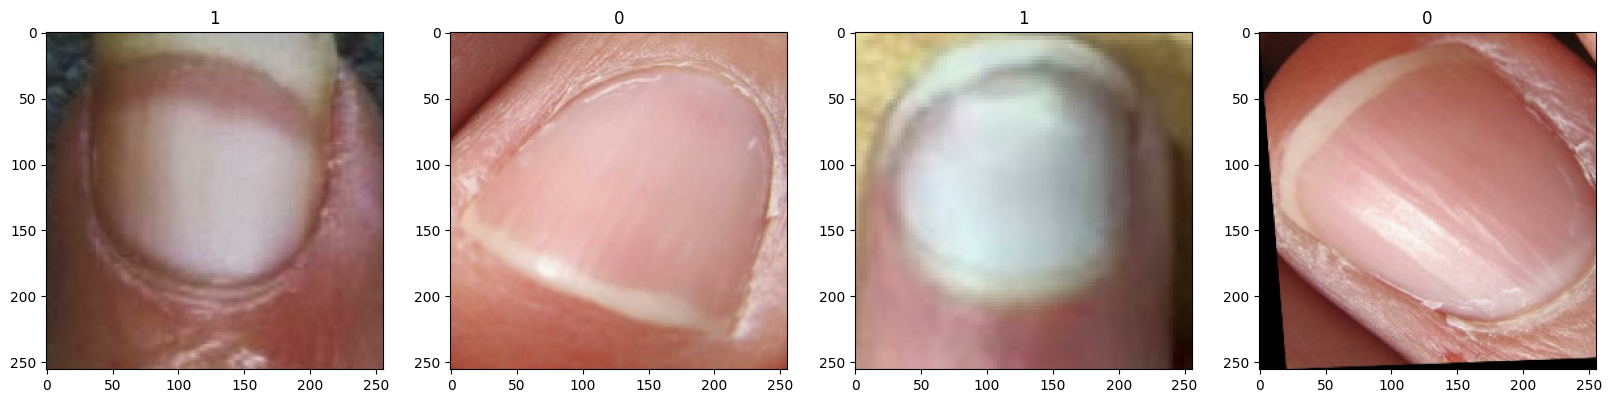

In [ ]:
batch = data.as_numpy_iterator().next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Split data
len(data)

9

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size

6

In [ ]:
val_size

2

In [ ]:
test_size

1

In [ ]:
#take and skip
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Simple CNN

In [ ]:
#Build Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
'''
Conv2d -> konvolusi
MaxPooling2D -> act like condensing layer so it actually goes through images and condense it down so it
                goes what's the max value in this region only return
Dense -> fully connected laye
Flatten -> reduce it
Dropout -> regularization
'''

"\nConv2d -> konvolusi\nMaxPooling2D -> act like condensing layer so it actually goes through images and condense it down so it\n                goes what's the max value in this region only return\nDense -> fully connected laye\nFlatten -> reduce it\nDropout -> regularization\n"

In [ ]:
model = Sequential()

#Three convolutional blocks
#Conv2D(16,(3,3),1 -> 16 filters scans over an image and tries to condense or extract the relevant information
#size filter is 3x3
#stride 1 means it's going to move one pixel each time
#relu, any output below zero will converted to zero
model.add(Conv2D(32,(3,3),1, activation='relu', input_shape=(256,256,3))) #layer konvoluse dengan 32 filter, 3x3 kernel, dan aktivasi relu
model.add(MaxPooling2D()) #layer max pooling untuk mengurangi dimensi layar input dengan ukuran (2,2) yang berarti akan dikurangi setengahnya dalam kedua dimensi

#model.add(Conv2D(32,(3,3),1, activation='relu'))
#model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())
#model.add(GlobalAveragePooling2D())

model.add(Conv2D(8,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

#Flattened layer
model.add(Flatten()) #untuk mengubah tensor multidimensi menjadi vektor satu dimensi.

#Dense layer
model.add(Dense(256, activation='relu')) #menghubungkan layer-layer dengan 256 neuron
model.add(Dropout(0.5)) #teknik regularisasi dengan menghilangkan sebagian neuron secara acak untuk mencegah overfitting
model.add(Dense(1, activation='sigmoid')) #menghubungkan lapisan, sigmoid berarti outputnya ada dalam rentang 0 dan 1

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_65 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_66 (Conv2D)          (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 60, 60, 8)         1160      
                                                                 
 max_pooling2d_67 (MaxPooli  (None, 30, 30, 8)       

## Train

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
6/6 [==============================] - 4s 238ms/step - loss: 0.7159 - accuracy: 0.5365 - val_loss: 0.6902 - val_accuracy: 0.6719
Epoch 2/30
6/6 [==============================] - 2s 303ms/step - loss: 0.6913 - accuracy: 0.5521 - val_loss: 0.6740 - val_accuracy: 0.6250
Epoch 3/30
6/6 [==============================] - 2s 215ms/step - loss: 0.6671 - accuracy: 0.6042 - val_loss: 0.6081 - val_accuracy: 0.7656
Epoch 4/30
6/6 [==============================] - 2s 299ms/step - loss: 0.6200 - accuracy: 0.6510 - val_loss: 0.5656 - val_accuracy: 0.7812
Epoch 5/30
6/6 [==============================] - 3s 313ms/step - loss: 0.5857 - accuracy: 0.7031 - val_loss: 0.4821 - val_accuracy: 0.8125
Epoch 6/30
6/6 [==============================] - 2s 205ms/step - loss: 0.5201 - accuracy: 0.7760 - val_loss: 0.5210 - val_accuracy: 0.7656
Epoch 7/30
6/6 [==============================] - 2s 299ms/step - loss: 0.4939 - accuracy: 0.7500 - val_loss: 0.3809 - val_accuracy: 0.8750
Epoch 8/30
6/6 [====

In [ ]:
model.save('/content/drive/MyDrive/BAI/model/simpleCNN.keras')

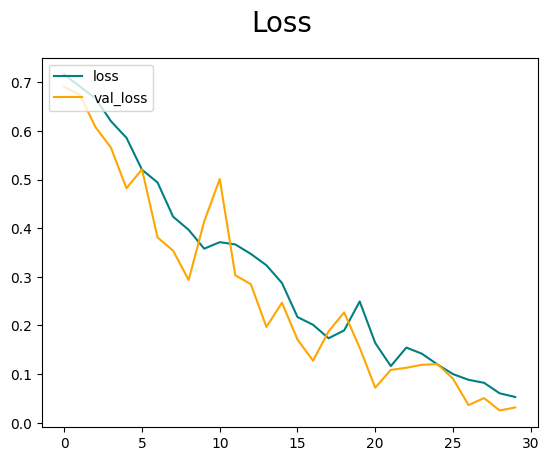

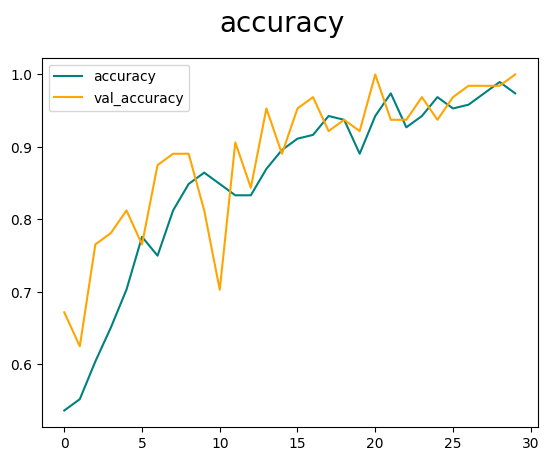

In [ ]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#plot performance
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label ='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 0s 37ms/step
Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

In [ ]:
import cv2

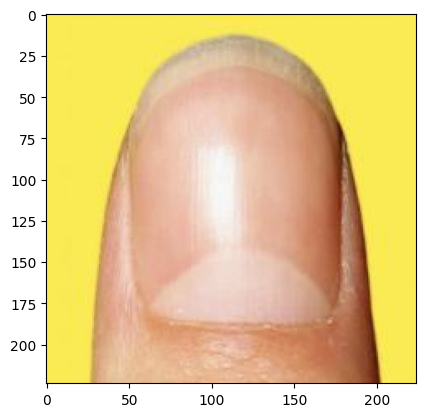

1/1 [==============================] - 0s 27ms/step
2.8052941161149647e-06
normal nail


In [ ]:
#normal
img=cv2.imread('/content/drive/MyDrive/BAI/Normal nail.v3i.multiclass/test/Screen-Shot-2021-11-15-at-11-50-14-AM_png_jpg.rf.fec080f363c62776380b2715a7109831.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
yhat=float(yhat)
yhat

print(yhat)
if yhat < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

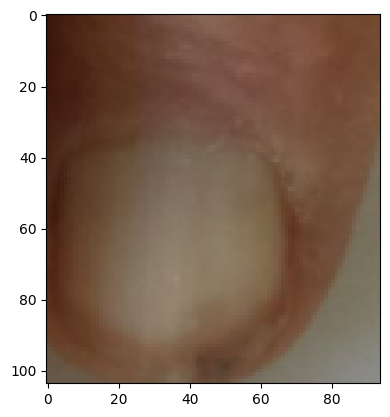

1/1 [==============================] - 0s 42ms/step
0.9981666803359985
terrys nail


In [ ]:
#abnormal
img=cv2.imread('/content/drive/MyDrive/BAI/new nail dataset/normal and terry/terry (5).PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

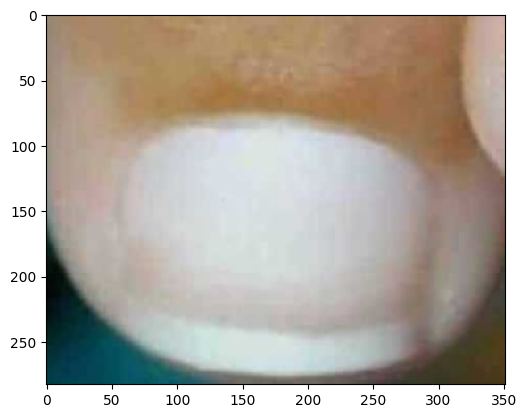

1/1 [==============================] - 0s 26ms/step
0.0017033019103109837
normal nail


In [ ]:
#abnormal
img=cv2.imread('/content/drive/MyDrive/BAI/terry2.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(256,256))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

# Mobilenet

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
# Define a function to reshape each image
def reshape_image(image, _):
    return tf.image.resize(image, (224, 224))

# Map the reshape function to the dataset
reshaped_train = train.map(lambda x, _: (reshape_image(x, _), _))
reshaped_val = val.map(lambda x, _: (reshape_image(x, _), _))

# Now, `reshaped_dataset` contains images of shape (224, 224, 3)


In [ ]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')
mobilenet.trainable = False

model = Sequential()
model.add(mobilenet)

model.add(Conv2D(64, (3, 3), activation='relu')) #layer konvoluse dengan 128 filter, 3x3 kernel, dan aktivasi relu
model.add(MaxPooling2D(pool_size=(2, 2))) #layer max pooling untuk mengurangi dimensi layar input dengan ukuran (2,2) yang berarti akan dikurangi setengahnya dalam kedua dimensi
model.add(GlobalAveragePooling2D()) #digunakan untuk mengurangi jumlah parameter yang diperlukan dengan mengambil nilai rata-rata dan mencegah overfitting

#model.add(Flatten())
#model.add(Dense(1024, activation="relu"))
#model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5)) #teknik regularisasi dengan menghilangkan sebagian neuron secara acak untuk mencegah overfitting
model.add(Dense(1, activation="sigmoid" , name="classification")) #menghubungkan lapisan, sigmoid berarti outputnya ada dalam rentang 0 dan 1

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          589888    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
hist = model.fit(reshaped_train, epochs=10, validation_data = reshaped_val)

Epoch 1/10
6/6 [==============================] - 8s 805ms/step - loss: 2.4734 - accuracy: 0.5625 - val_loss: 0.4552 - val_accuracy: 0.8125
Epoch 2/10
6/6 [==============================] - 3s 298ms/step - loss: 0.6274 - accuracy: 0.7708 - val_loss: 0.2931 - val_accuracy: 0.8750
Epoch 3/10
6/6 [==============================] - 2s 281ms/step - loss: 0.3223 - accuracy: 0.8802 - val_loss: 0.1637 - val_accuracy: 0.9219
Epoch 4/10
6/6 [==============================] - 2s 308ms/step - loss: 0.2014 - accuracy: 0.9010 - val_loss: 0.1174 - val_accuracy: 0.9531
Epoch 5/10
6/6 [==============================] - 3s 313ms/step - loss: 0.1606 - accuracy: 0.9375 - val_loss: 0.0943 - val_accuracy: 0.9531
Epoch 6/10
6/6 [==============================] - 5s 596ms/step - loss: 0.0974 - accuracy: 0.9688 - val_loss: 0.0785 - val_accuracy: 0.9531
Epoch 7/10
6/6 [==============================] - 3s 320ms/step - loss: 0.0917 - accuracy: 0.9844 - val_loss: 0.0619 - val_accuracy: 0.9688
Epoch 8/10
6/6 [====

In [ ]:
model.save('/content/drive/MyDrive/BAI/model/mobileNet.keras')

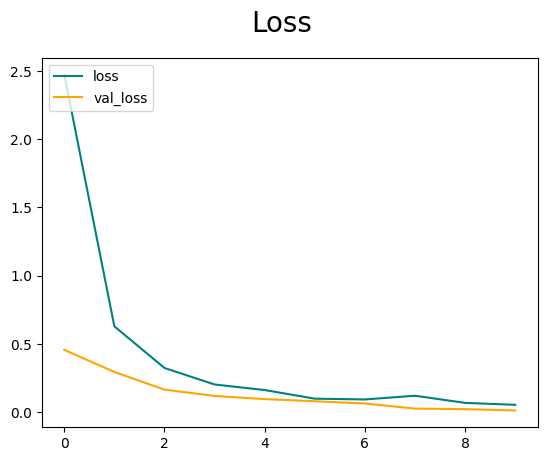

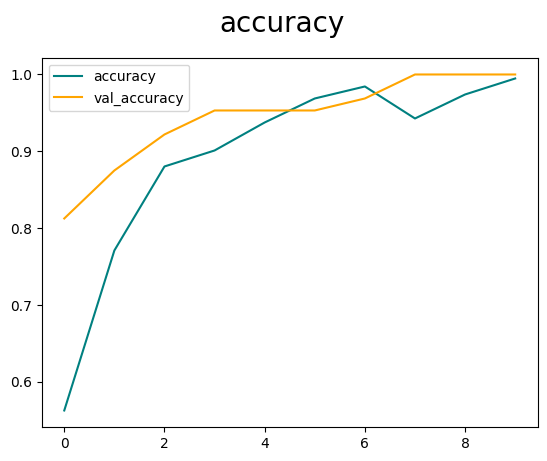

In [ ]:
#plot performance
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label ='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label ='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  resize=tf.image.resize(X,(224,224))
  yhat = model.predict(resize)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 [==============================] - 1s 982ms/step
Precision:1.0, Recall:1.0, Accuracy:1.0


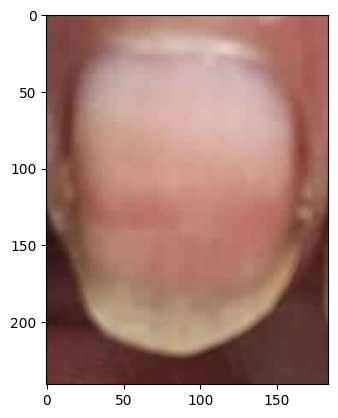

1/1 [==============================] - 0s 256ms/step
0.8401209712028503
terrys nail


In [ ]:
#abnormal
img=cv2.imread('/content/drive/MyDrive/BAI/terry.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

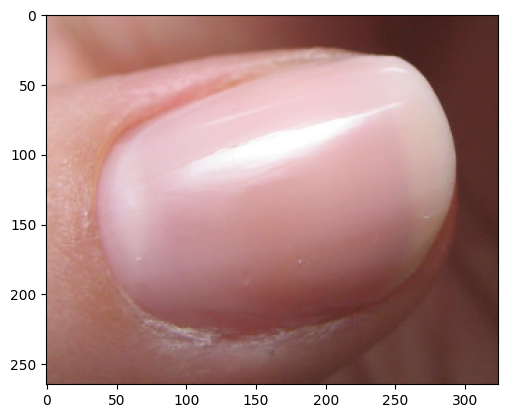

1/1 [==============================] - 0s 25ms/step
0.09994093328714371
normal nail


In [ ]:
#normal
img=cv2.imread('/content/drive/MyDrive/BAI/tes/healthy nail.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

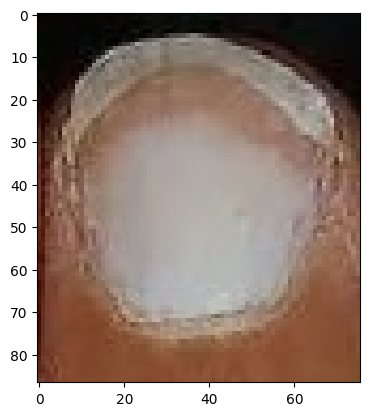

1/1 [==============================] - 0s 29ms/step
0.9999901056289673
terrys nail


In [ ]:
#terry
img=cv2.imread('/content/drive/MyDrive/BAI/tes/terry (14).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

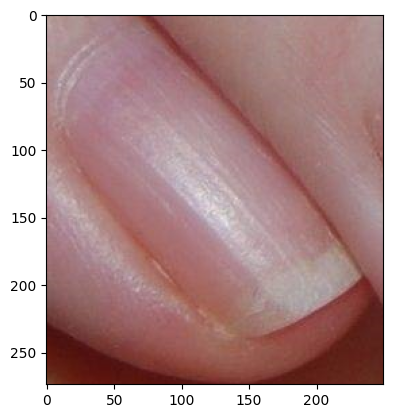

1/1 [==============================] - 0s 22ms/step
8.413362024839444e-07
normal nail


In [ ]:
#health
img=cv2.imread('/content/drive/MyDrive/BAI/tes/normal (17).jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(224,224))
yhat = model.predict(np.expand_dims(resize/255,0))
res=float(yhat)
print(res)
if res < 0.5:
  print('normal nail')
else:
  print('terry''s nail')

# Test Model using different Dataset

## Simple CNN

1/1 [==============================] - 0s 19ms/step


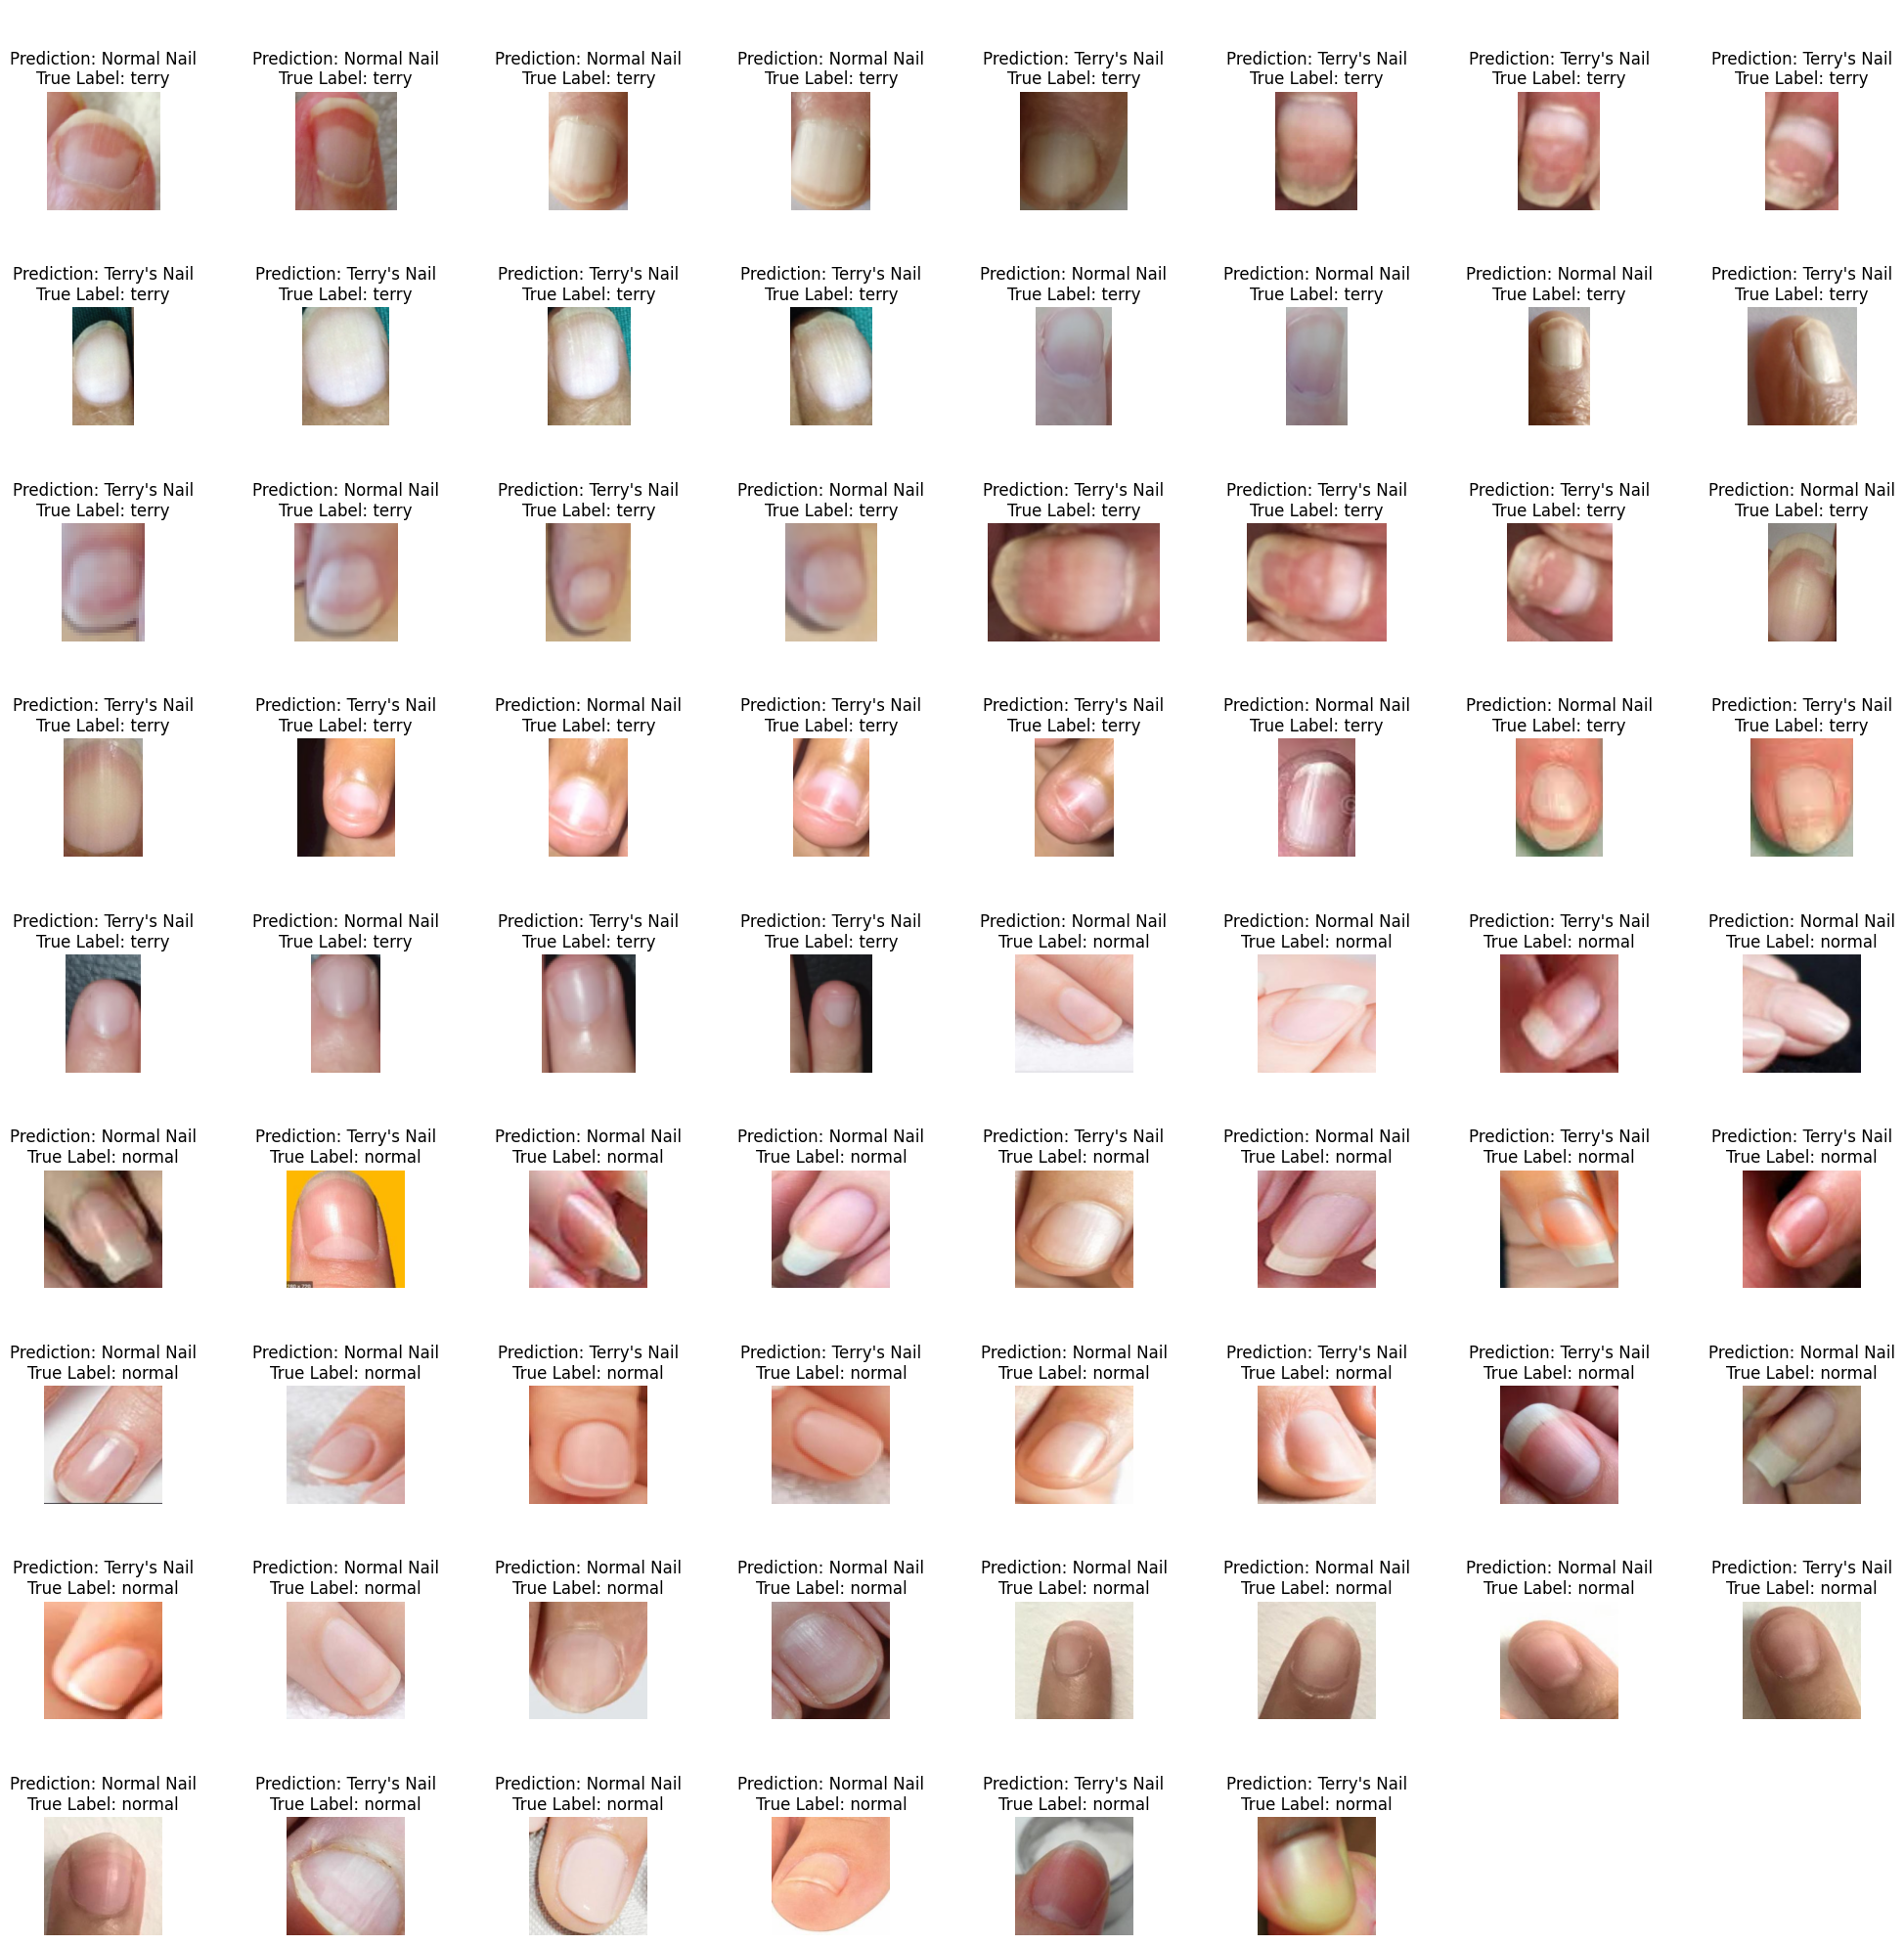

In [ ]:
import os
import numpy as np
import re  # Untuk menggunakan regular expression
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/BAI/model/simpleCNN.keras')

# Path to the directory containing images
folder_path = '/content/drive/MyDrive/BAI/new nail dataset/normal and terry'

# List to store image paths, images, predictions, and true labels
image_paths = []
images = []
predictions = []
true_labels = []

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Predict for images in the folder
for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)

    # Determine the label based on the prediction
    if prediction < 0.5:
        label = "Normal Nail"
    else:
        label = "Terry's Nail"

    # Extract the true label from the file name
    true_label = re.sub(r'[\d\W_]+.{3}$', '', img_name).split('.')[0]

    # Append image details to the lists
    image_paths.append(img_path)
    images.append(image.load_img(img_path))
    predictions.append((prediction, label))
    true_labels.append(true_label)

# Display images in a grid layout
num_images = len(images)
num_cols = 8  # Number of columns in the grid
num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

plt.figure(figsize=(20, 20))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f'\n\nPrediction: {predictions[i][1]}\nTrue Label: {true_labels[i]}')

plt.tight_layout()
plt.show()


In [ ]:
# Initialize lists to store predicted labels and true labels
predicted_labels = []

# Collect predicted labels
for prediction in predictions:
    predicted_labels.append(prediction[1])

# Convert labels to binary (1 for Terry's Nail and 0 for Normal Nail)
true_labels_binary = [1 if label == "terry" else 0 for label in true_labels]
predicted_labels_binary = [1 if label == "Terry's Nail" else 0 for label in predicted_labels]
print(true_labels)
print(true_labels_binary)
print(predicted_labels_binary)


['terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels_binary, predicted_labels_binary)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix[1, 1] #Data positif yang diprediksi benar sebagai positif
TN = conf_matrix[0, 0] #Data negatif yang diprediksi benar sebagai negatif
FP = conf_matrix[0, 1] #Data negatif tetapi diprediksi sebagai positif -> normal dianggap terry
FN = conf_matrix[1, 0] #Data positif tetapi diprediksi sebagai negatif -> terry dianggap normal

print(TP)
print(TN)
print(FP)
print(FN)


22
20
14
14


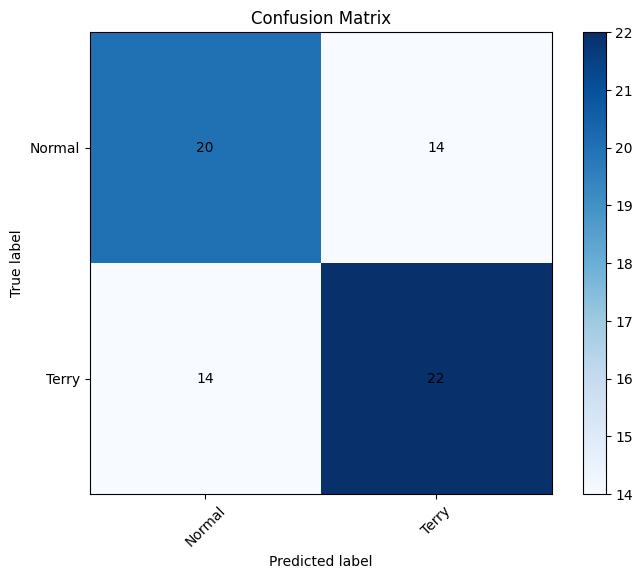

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have calculated conf_matrix using confusion_matrix

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Terry']  # Assuming these are the class labels

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='black')

plt.show()


In [ ]:
# Sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

# Specificity (true negative rate)
specificity = TN / (TN + FP)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


Sensitivity (True Positive Rate): 0.61
Specificity (True Negative Rate): 0.59



Hasil klasifikasi menunjukkan bahwa sensitivitas (True Positive Rate) sebesar 0,61, mengindikasikan bahwa model berhasil mengidentifikasi sekitar 61% dari seluruh kuku yang sebenarnya adalah terry's nail. Sensitivitas mencerminkan kemampuan model untuk mengenali kasus positif dengan akurasi relatif tinggi, namun ada sekitar 39% kasus terry's nail yang tidak teridentifikasi. Di sisi lain, spesifisitas (True Negative Rate) sebesar 0,59 menunjukkan bahwa model dapat mengidentifikasi normal nails sekitar 59% dari seluruh kasus yang sebenarnya normal. Namun, sekitar 41% kasus normal nails salah diidentifikasi sebagai terry's nail. Oleh karena itu, model ini memiliki tingkat kesalahan yang signifikan, dan peningkatan performa perlu dipertimbangkan untuk meminimalkan kesalahan diagnosa, terutama dalam kasus terry's nail yang penting untuk penanganan medis yang tepat.

## MobileNet

1/1 [==============================] - 0s 26ms/step


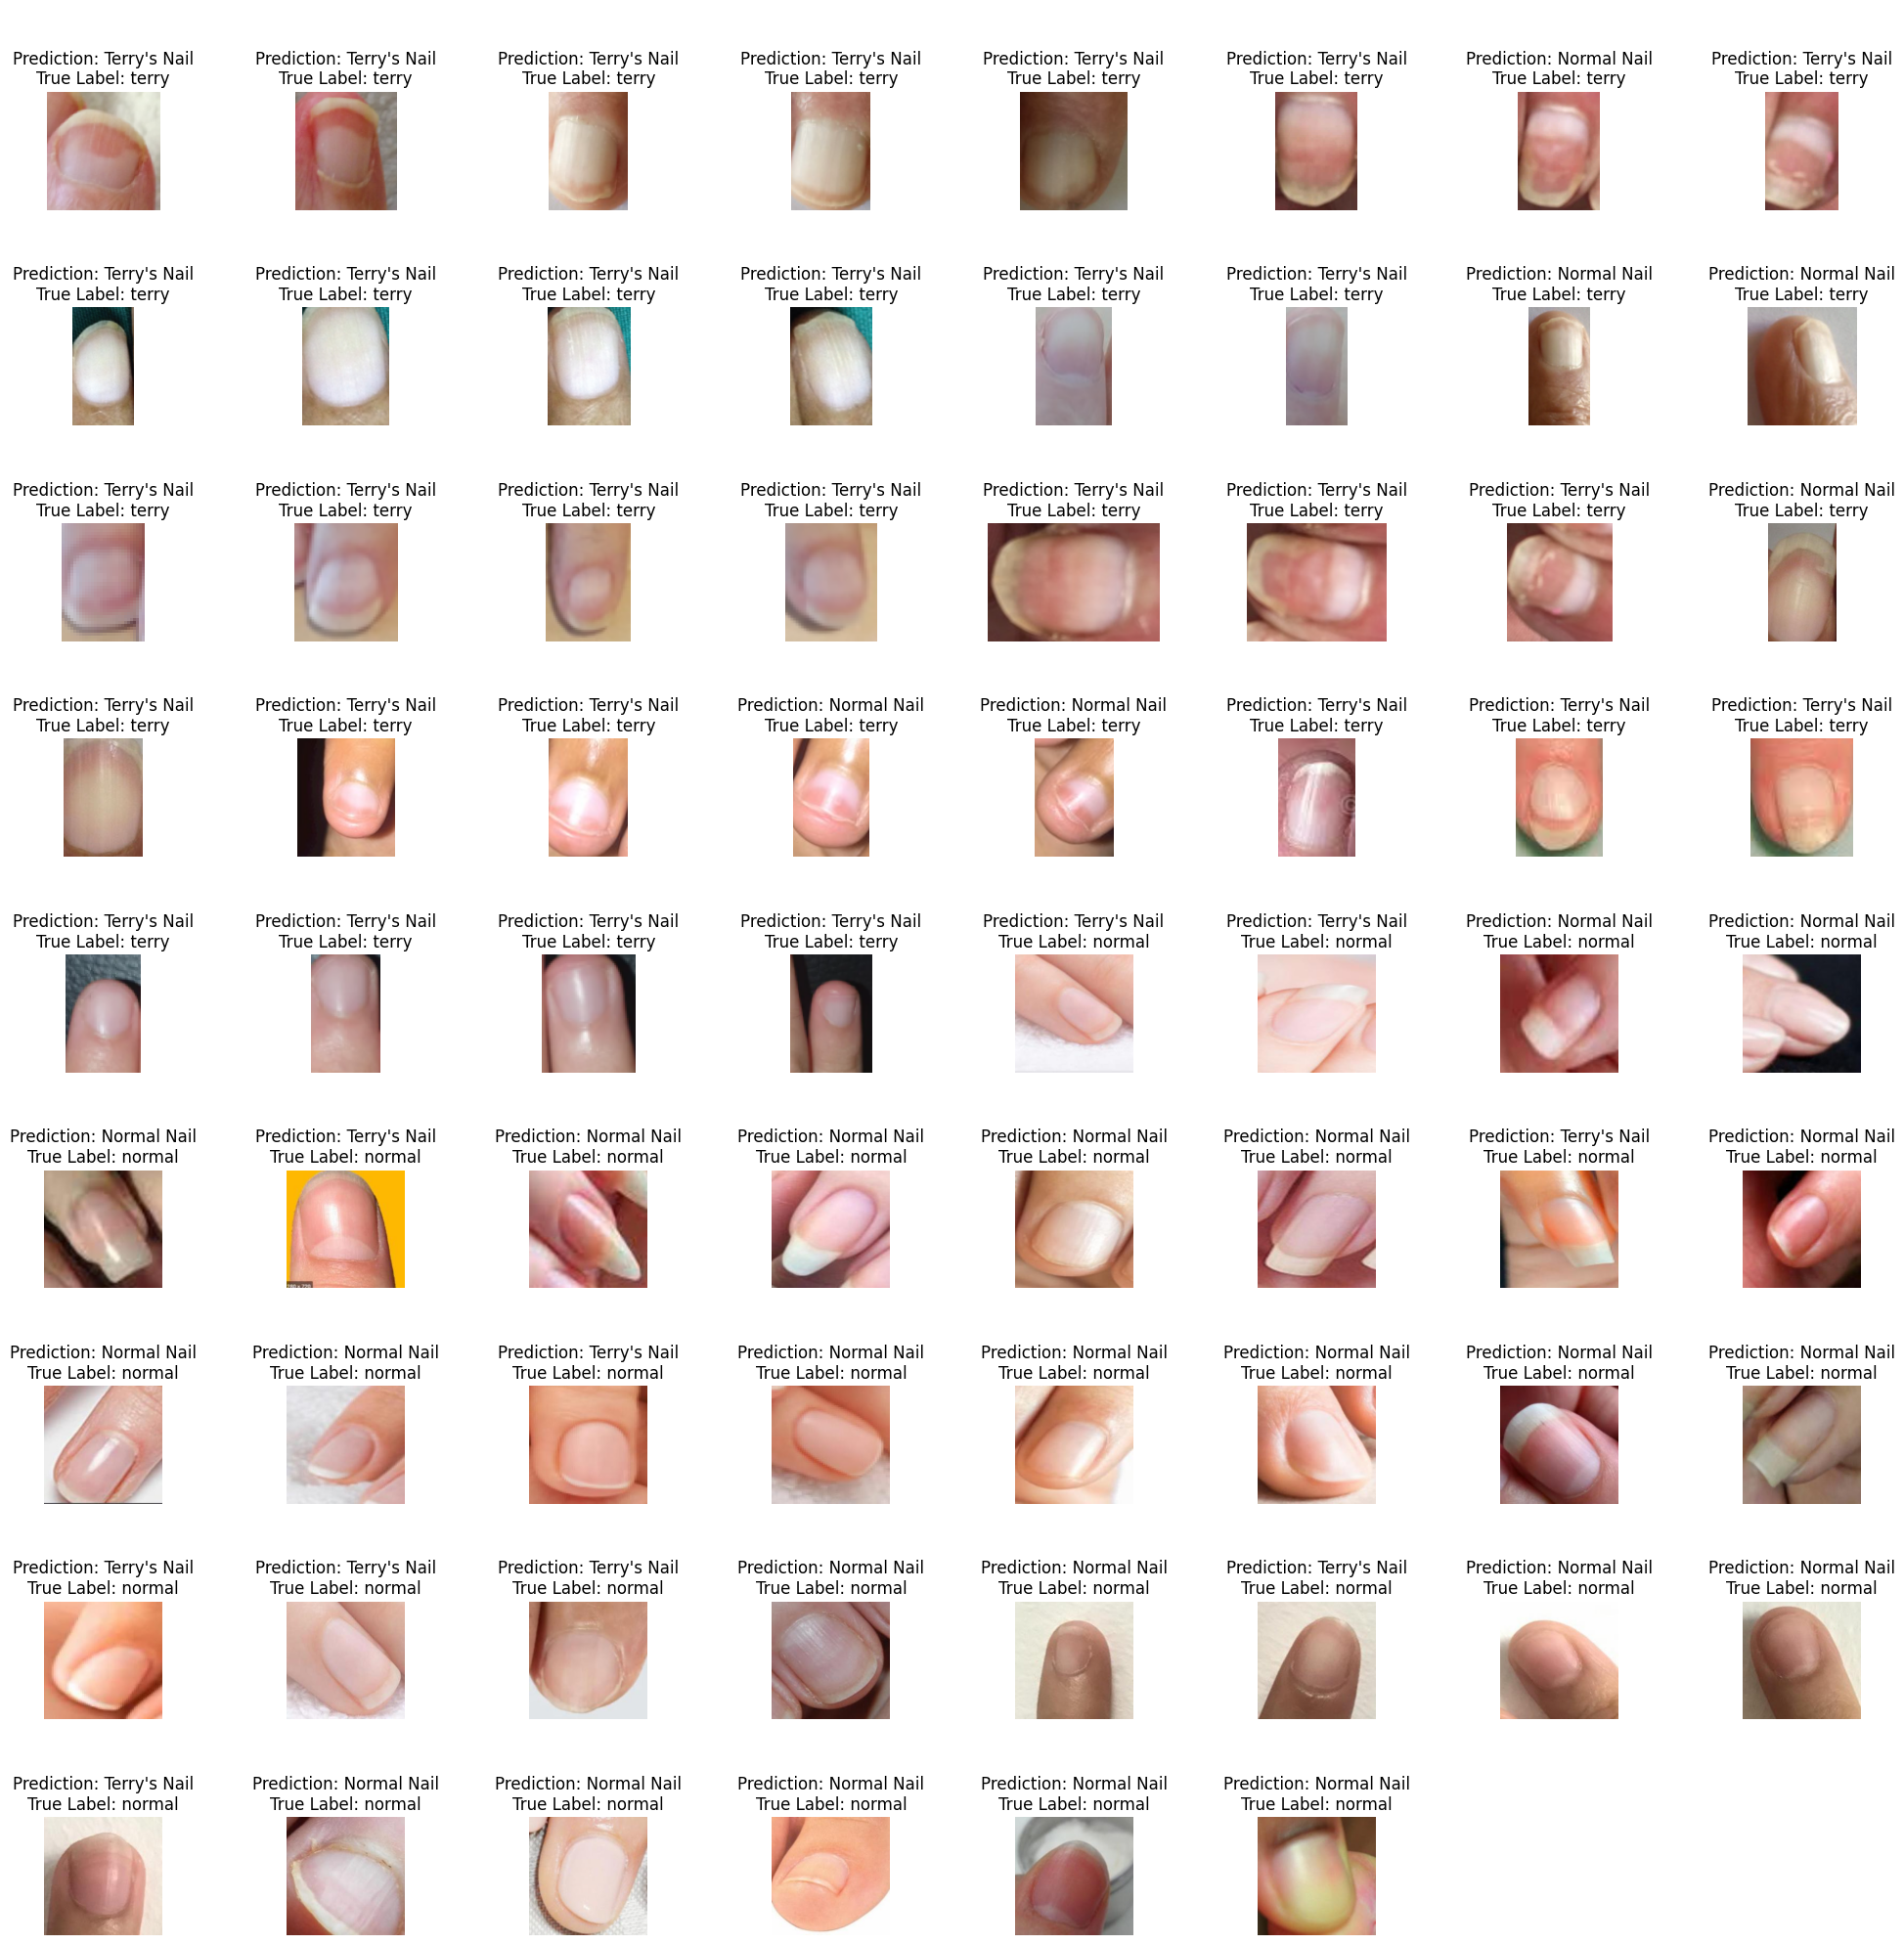

In [ ]:
# Load the pre-trained model
model = load_model('/content/drive/MyDrive/BAI/model/mobileNet.keras')

# Path to the directory containing images
folder_path = '/content/drive/MyDrive/BAI/new nail dataset/normal and terry'

# List to store image paths, images, predictions, and true labels
image_paths = []
images = []
predictions = []
true_labels = []

# Function to preprocess an image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Predict for images in the folder
for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    preprocessed_img = preprocess_image(img_path)
    prediction = model.predict(preprocessed_img)

    # Determine the label based on the prediction
    if prediction < 0.5:
        label = "Normal Nail"
    else:
        label = "Terry's Nail"

    # Extract the true label from the file name
    true_label = re.sub(r'[\d\W_]+.{3}$', '', img_name).split('.')[0]

    # Append image details to the lists
    image_paths.append(img_path)
    images.append(image.load_img(img_path))
    predictions.append((prediction, label))
    true_labels.append(true_label)

# Display images in a grid layout
num_images = len(images)
num_cols = 8  # Number of columns in the grid
num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

plt.figure(figsize=(20, 20))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f'\n\nPrediction: {predictions[i][1]}\nTrue Label: {true_labels[i]}')

plt.tight_layout()
plt.show()


In [ ]:
# Initialize lists to store predicted labels and true labels
predicted_labels = []

# Collect predicted labels
for prediction in predictions:
    predicted_labels.append(prediction[1])

# Convert labels to binary (1 for Terry's Nail and 0 for Normal Nail)
true_labels_binary = [1 if label == "terry" else 0 for label in true_labels]
predicted_labels_binary = [1 if label == "Terry's Nail" else 0 for label in predicted_labels]
print(true_labels)
print(true_labels_binary)
print(predicted_labels)
print(predicted_labels_binary)


['terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'terry', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
["Terry's Nail", "Terry's Nail", "Terry's Nail", "Terry's Nail", "Terry's Nail", "Terry's Nail", 'Normal Nail', "Terry's Nai

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels_binary, predicted_labels_binary)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(TP)
print(TN)
print(FP)
print(FN)


30
24
10
6


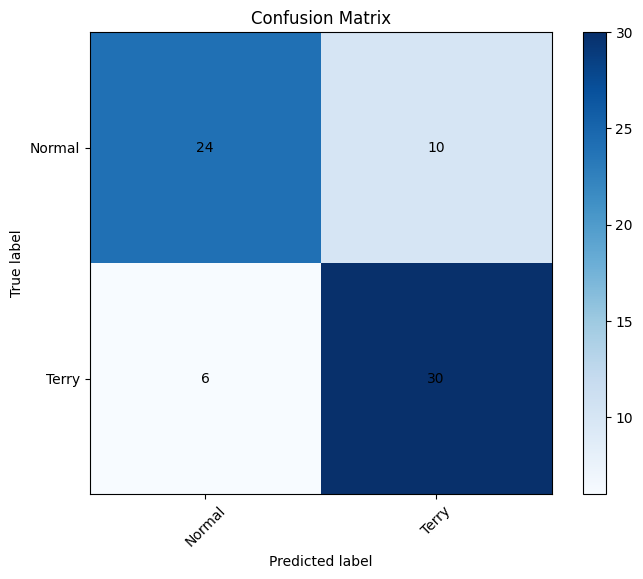

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have calculated conf_matrix using confusion_matrix

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Normal', 'Terry']  # Assuming these are the class labels

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add text annotations to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='black')

plt.show()


In [ ]:
# Sensitivity (true positive rate)
sensitivity = TP / (TP + FN)

# Specificity (true negative rate)
specificity = TN / (TN + FP)

print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")


Sensitivity (True Positive Rate): 0.83
Specificity (True Negative Rate): 0.71



Hasil klasifikasi menunjukkan sensitivitas (True Positive Rate) sebesar 0,83, menandakan bahwa model berhasil mengidentifikasi sekitar 83% dari seluruh kuku yang sebenarnya adalah terry's nail. Sensitivitas yang tinggi menggambarkan kemampuan model untuk mengenali kasus positif dengan akurasi relatif tinggi, namun masih terdapat sekitar 17% kasus terry's nail yang tidak teridentifikasi.

Di sisi lain, spesifisitas (True Negative Rate) sebesar 0,71 menunjukkan bahwa model dapat mengidentifikasi normal nails sekitar 71% dari seluruh kasus yang sebenarnya normal. Namun, sekitar 29% kasus normal nails salah diidentifikasi sebagai terry's nail. Meskipun spesifisitas cukup tinggi, ada potensi untuk meminimalkan angka false positive agar diagnosa lebih akurat, terutama untuk memastikan bahwa pasien dengan normal nails tidak salah dianggap memiliki terry's nail. Sebaiknya, evaluasi lebih lanjut terhadap model ini diperlukan untuk meningkatkan performa dan memastikan penanganan yang tepat.

Meskipun masih diperlukan peningkatan performa, hasil model MobileNet ini masih lebih baik dibandingkan hasil CNN sederhana sebelumnya